<a href="https://colab.research.google.com/github/r2x4/challenge-final/blob/main/modelo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  

----
# <center><font color="#615FFF" size="12"><b> Modelo Final </b></font></center>
----

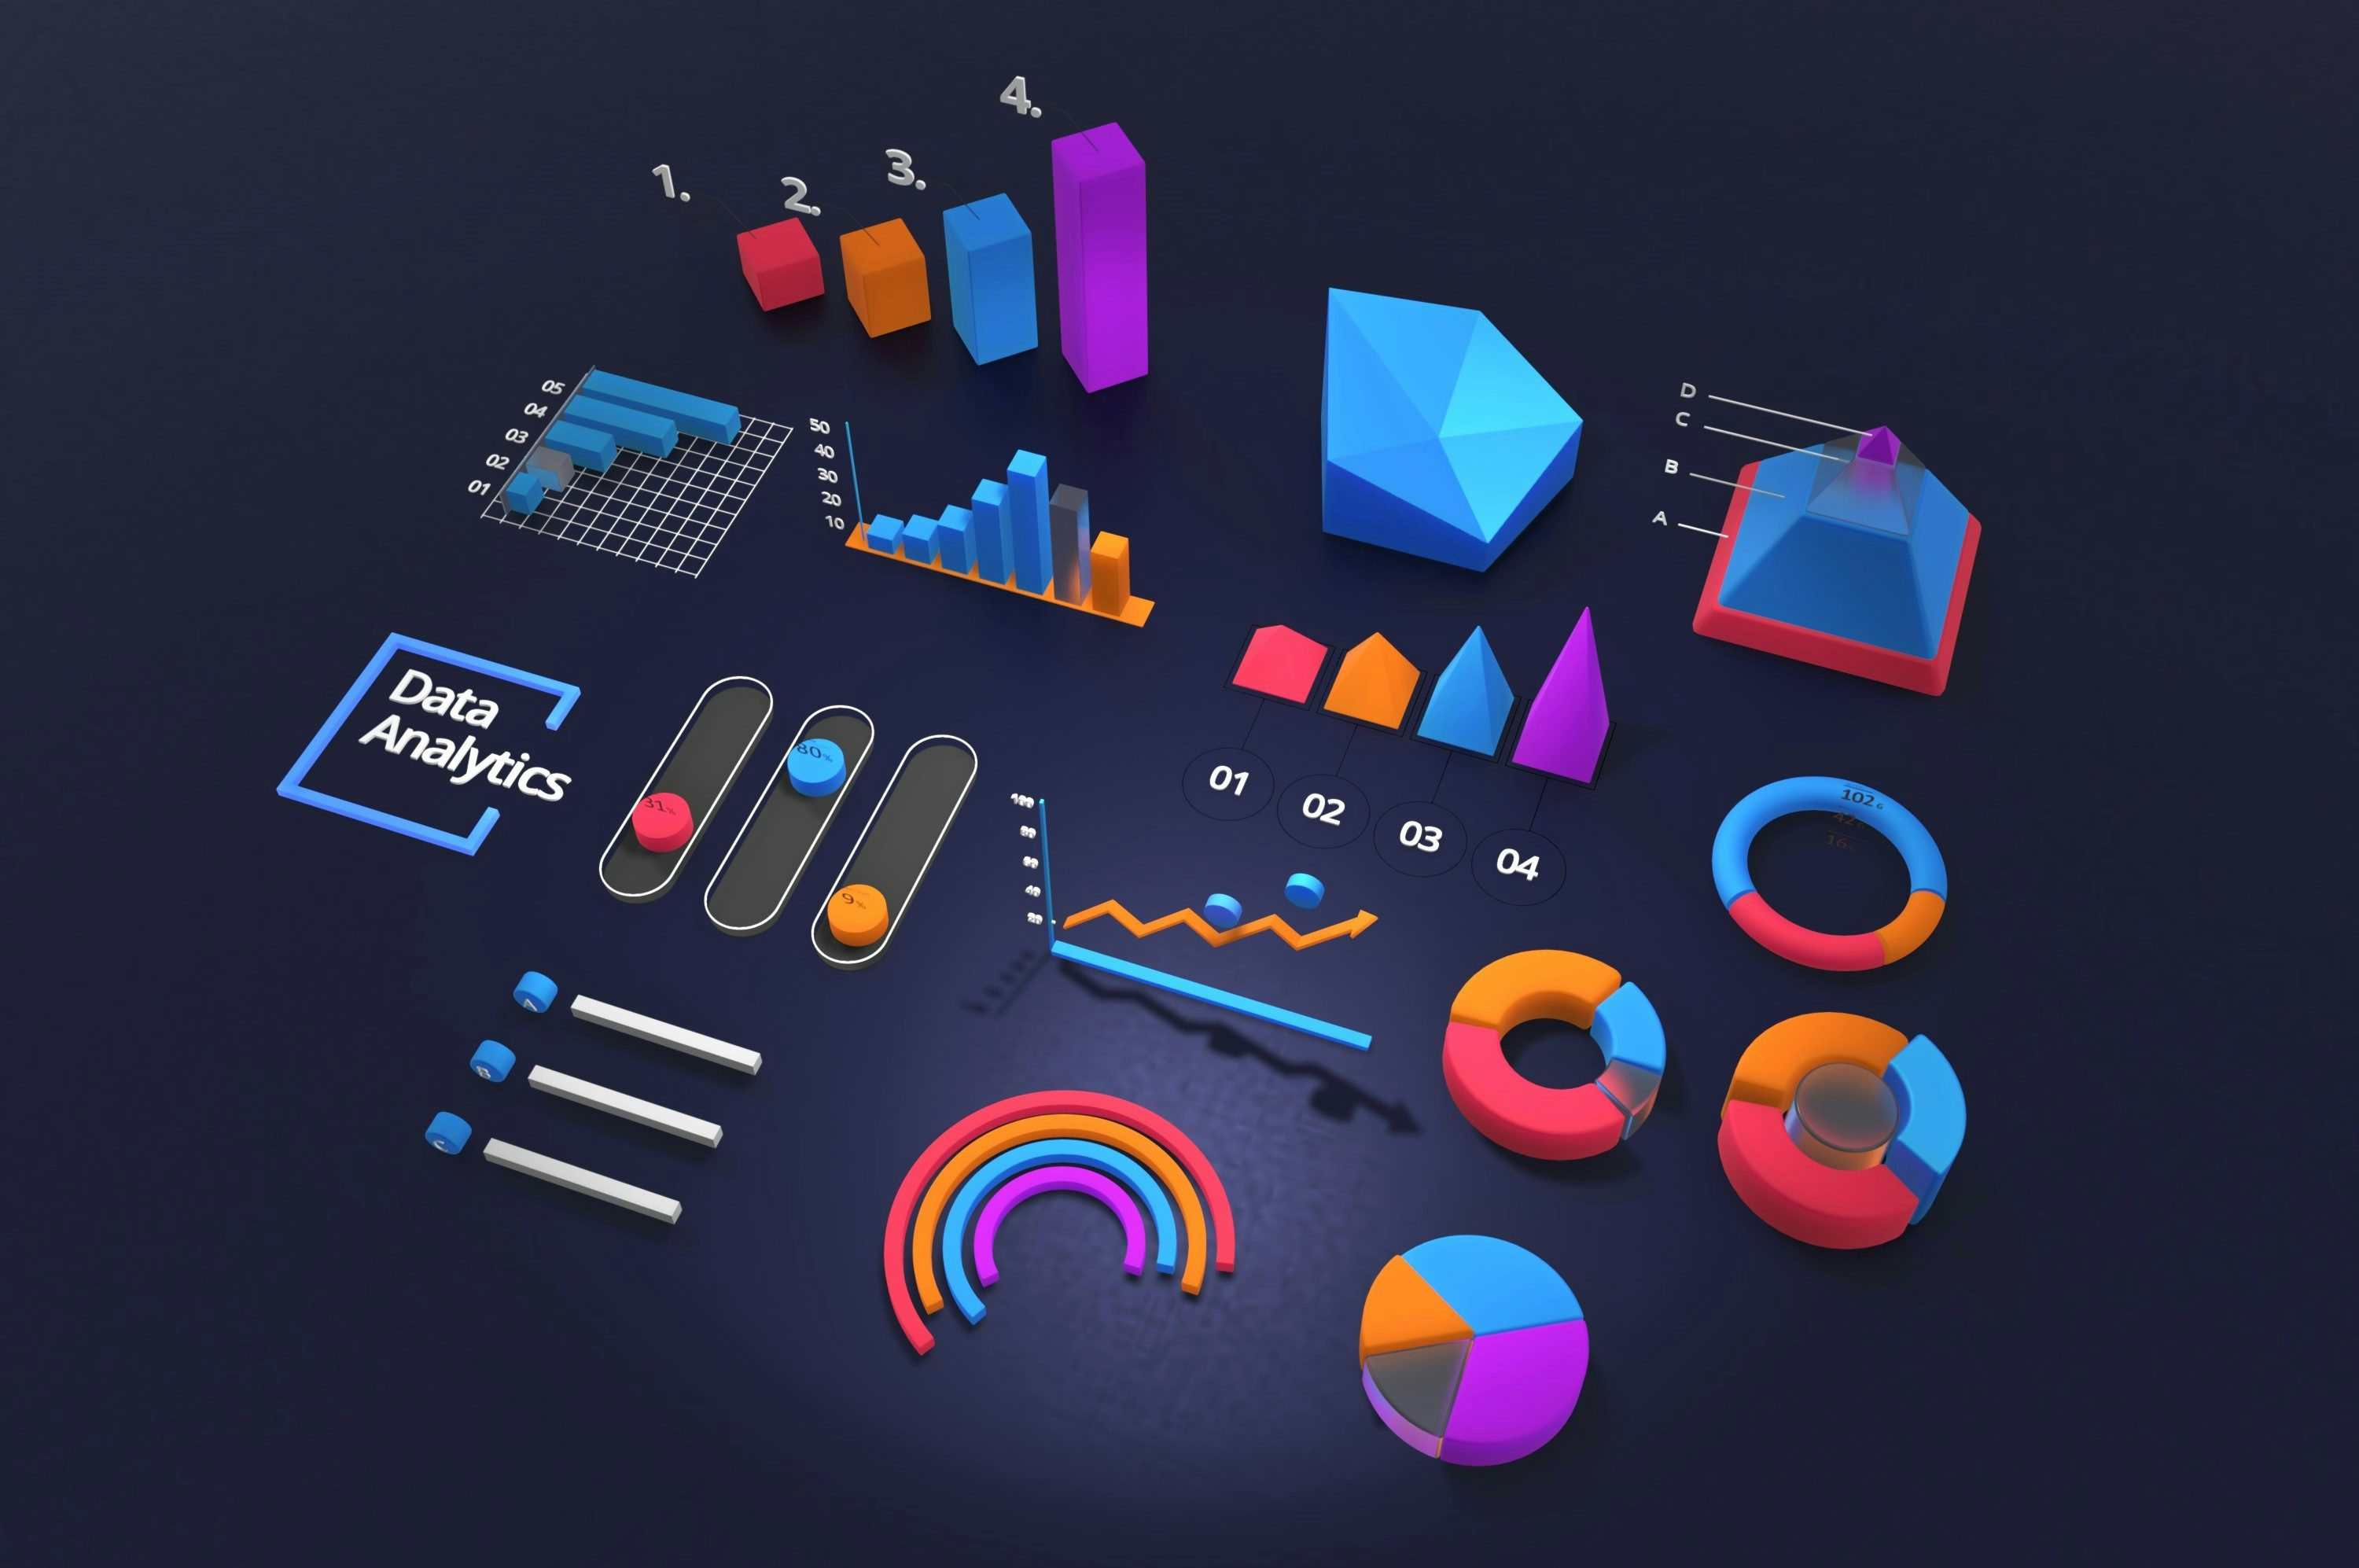

# Nueva sección

In [195]:
# llamar datos de JSON
import pandas as pd
import os
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
datos = pd.read_json('/content/datos_final.json', lines=True)

In [196]:
datos.sample(4)

,ID_Cliente,Cancelación,Género,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Factura_Electrónica,Método_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
5227,7131-ZQZNK,0.0,Female,0,1,1,60,0,No phone service,DSL,...,1,1,1,1,Two year,0,Credit card (automatic),59.85,3590.2,1.995
7025,9674-EHPPG,0.0,Male,0,1,0,46,0,No phone service,DSL,...,1,1,0,0,Two year,0,Credit card (automatic),40.40,1842.7,1.347
3987,5448-VWNAM,0.0,Female,0,0,1,19,1,1,DSL,...,0,1,1,0,Month-to-month,1,Mailed check,75.90,1375.6,2.530
5529,7576-OYWBN,1.0,Male,1,0,0,3,1,1,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,76.05,231.8,2.535


In [197]:
datos.shape

(7267, 22)

In [198]:
datos.dtypes

,0
ID_Cliente,object
Cancelación,float64
Género,object
Adulto_Mayor,int64
Tiene_Pareja,int64
Tiene_Dependientes,int64
Meses_Conectado,int64
Servicio_Teléfono,int64
Líneas_Múltiples,object
Servicio_Internet,object


In [199]:
# nulos
datos.isnull().sum()

,0
ID_Cliente,0
Cancelación,224
Género,0
Adulto_Mayor,0
Tiene_Pareja,0
Tiene_Dependientes,0
Meses_Conectado,0
Servicio_Teléfono,0
Líneas_Múltiples,0
Servicio_Internet,0


In [200]:
# Eliminar filas con NaN en 'Cancelación' o 'Cargos_Totales'
datos = datos.dropna(subset=['Cancelación', 'Cargos_Totales'])

In [201]:
datos.isnull().sum()

,0
ID_Cliente,0
Cancelación,0
Género,0
Adulto_Mayor,0
Tiene_Pareja,0
Tiene_Dependientes,0
Meses_Conectado,0
Servicio_Teléfono,0
Líneas_Múltiples,0
Servicio_Internet,0


#  

----
# <center><font color="#615FFF" size="8"> Correlacion </font></center>
----

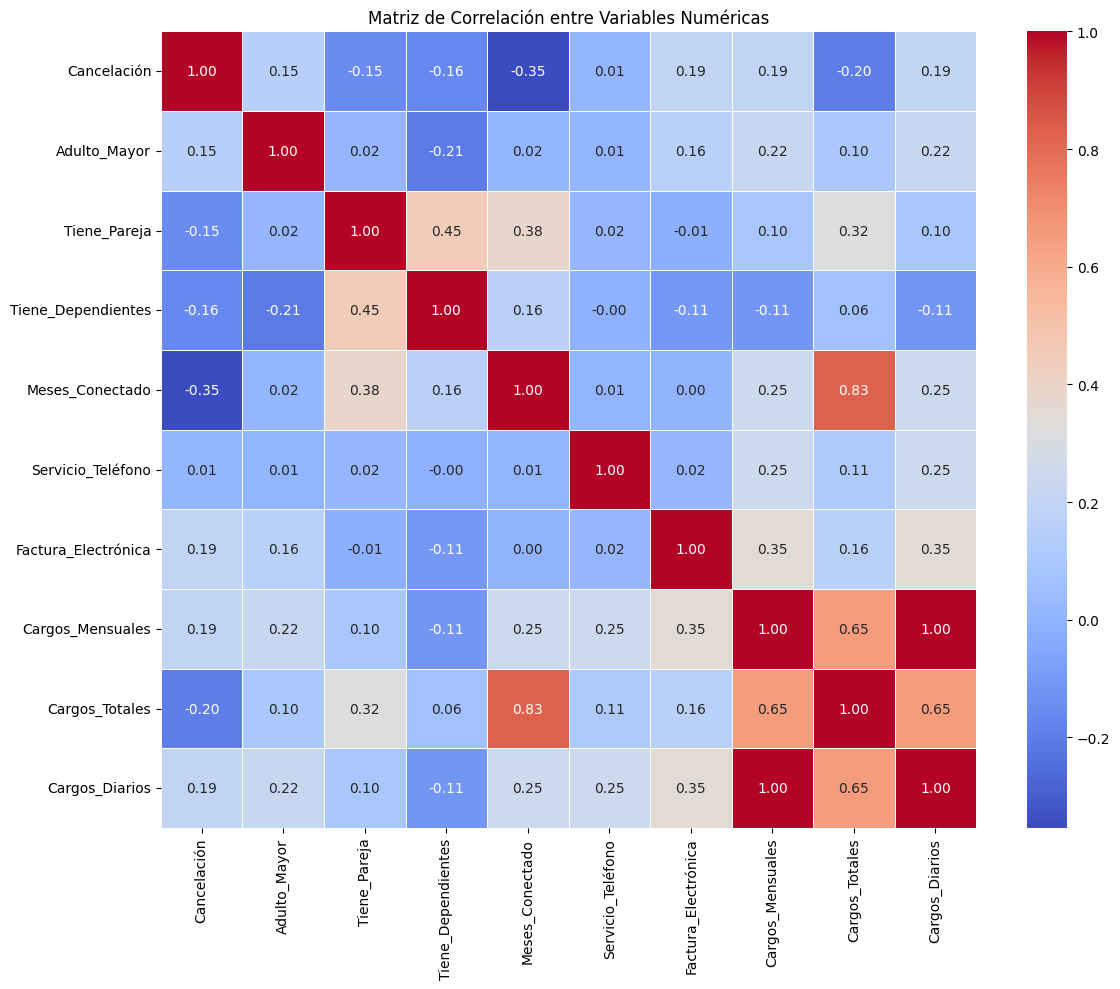

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usamos 'datos' como nombre del DataFrame (ajusta si tiene otro nombre)
numericas = datos.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlación
correlacion = numericas.corr()

# Graficamos el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

In [203]:
# Correlacion

numericas = datos.select_dtypes(include=['int64', 'float64'])
correlacion = numericas.corr()
print(correlacion)

                     Cancelación  Adulto_Mayor  Tiene_Pareja  \
Cancelación             1.000000      0.150541     -0.149982   
Adulto_Mayor            0.150541      1.000000      0.016957   
Tiene_Pareja           -0.149982      0.016957      1.000000   
Tiene_Dependientes     -0.163128     -0.210550      0.452269   
Meses_Conectado        -0.354049      0.015683      0.381912   
Servicio_Teléfono       0.011691      0.008392      0.018397   
Factura_Electrónica     0.191454      0.156258     -0.013957   
Cargos_Mensuales        0.192858      0.219874      0.097825   
Cargos_Totales         -0.199484      0.102411      0.319072   
Cargos_Diarios          0.192857      0.219872      0.097830   

                     Tiene_Dependientes  Meses_Conectado  Servicio_Teléfono  \
Cancelación                   -0.163128        -0.354049           0.011691   
Adulto_Mayor                  -0.210550         0.015683           0.008392   
Tiene_Pareja                   0.452269         0.381912  

#  

----
# <center><font color="#615FFF" size="8">Eliminar Columnas</font></center>
----

In [204]:
datos_ml = datos.copy()
columnas_a_eliminar = ['ID_Cliente', 'Cargos_Totales', 'Cargos_Diarios']
datos_ml = datos_ml.drop(columns=columnas_a_eliminar)

#  

----
# <center><font color="#2B7FFF" size="6">🚀 Variables 🚀</font></center>
----

In [205]:
# Cracion de las variables
y = datos_ml['Cancelación']
X = datos_ml.drop('Cancelación', axis=1)

In [206]:
X = pd.get_dummies(X, drop_first=True)

In [207]:
# =====================
# 1. MEJORA DEL MODELO
# =====================

# Crear nuevas características
datos_ml['Cliente_Nuevo'] = (datos_ml['Meses_Conectado'] <= 6).astype(int)
datos_ml['Alto_Valor'] = (datos_ml['Cargos_Mensuales'] > datos_ml['Cargos_Mensuales'].quantile(0.75)).astype(int)
datos_ml['Cargos_Por_Mes'] = datos_ml['Cargos_Mensuales'] * datos_ml['Meses_Conectado']

# Contar servicios adicionales
servicios = ['Seguridad_En_Línea', 'Respaldo_En_Línea', 'Protección_Dispositivo',
            'Soporte_Técnico', 'TV_Streaming', 'Películas_Streaming']

total_servicios = 0
for servicio in servicios:
    if servicio in datos_ml.columns:
        servicio_num = pd.get_dummies(datos_ml[servicio], drop_first=True)
        if len(servicio_num.columns) > 0:
            total_servicios += servicio_num.iloc[:, 0]

datos_ml['Total_Servicios'] = total_servicios

In [208]:
# =========================
# 2. Division de los Datos
# =========================

# División adecuada de los datos
X,X_test,y,y_test = train_test_split(X, y, test_size=0.15, random_state=5, stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X, y, random_state=5, stratify=y)

In [209]:
estrategias = {
    'SMOTE': SMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

mejores_resultados = {}

for nombre, sampler in estrategias.items():
    print(f"Pruebas cuantificadas de las opciones : {nombre}...")

    # Balancear datos
    X_balanced, y_balanced = sampler.fit_resample(X_train, y_train)
    print(f"Datos balanceados: {Counter(y_balanced)}")

    # División entrenamiento/validación
    X_train, X_val, y_train, y_val = train_test_split(
        X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
    )

Pruebas cuantificadas de las opciones : SMOTE...
Datos balanceados: Counter({1.0: 3290, 0.0: 3290})
Pruebas cuantificadas de las opciones : BorderlineSMOTE...
Datos balanceados: Counter({0.0: 2632, 1.0: 2632})
Pruebas cuantificadas de las opciones : SMOTETomek...
Datos balanceados: Counter({1.0: 1986, 0.0: 1986})


In [210]:
#==================================================
# 4. OPTIMIZACIÓN DE HIPERPARÁMETROS
#==================================================

# Parámetros
param_grid = {
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'class_weight': ['balanced']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    dt,
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
mejor_modelo = grid_search.best_estimator_

In [211]:
#==================================================
# 5. EVALUACIÓN
#==================================================

# Predicciones
y_pred_val = mejor_modelo.predict(X_val)

# Métricas
f1 = f1_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)

print(f"Resultados con {nombre}:")
print(f"  F1 Score: {f1*100:.2f}%")
print(f"  Precisión: {precision*100:.2f}%")
print(f"  Recall: {recall*100:.2f}%")
print(f"  Exactitud: {accuracy*100:.2f}%")

# Guardar si es el mejor
mejores_resultados[nombre] = {
    'modelo': mejor_modelo,
    'f1': f1,
    'precisión': precision,
    'recall': recall,
    'accuracy': accuracy,
    'parametros': grid_search.best_params_
}

Resultados con SMOTETomek:
  F1 Score: 79.16%
  Precisión: 78.00%
  Recall: 80.35%
  Exactitud: 78.87%


In [212]:
# =====================================
# 6. ESTRATEGIA
# =====================================

mejor_estrategia = max(mejores_resultados.keys(),
                      key=lambda k: mejores_resultados[k]['f1'])

print(f"La mejor opcion para mejorar los datos es : {mejor_estrategia}")
print(f"F1 Score: {mejores_resultados[mejor_estrategia]['f1']:.4f}")
print(f"Parámetros: {mejores_resultados[mejor_estrategia]['parametros']}")

La mejor opcion para mejorar los datos es : SMOTETomek
F1 Score: 0.7916
Parámetros: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 50}


In [213]:
# =====================================
# 7. MODELO FINAL CON OPTIMIZACIÓN DE UMBRAL
# =====================================

print(f"\n🎯 Entrenamiento Final del Modelo {mejor_estrategia}...")

# Re-entrenar con la mejor estrategia
sampler_final = estrategias[mejor_estrategia]
X_final_balanced, y_final_balanced = sampler_final.fit_resample(X_train, y_train)

X_final_train, X_final_val, y_final_train, y_final_val = train_test_split(
    X_final_balanced, y_final_balanced, test_size=0.2, random_state=42, stratify=y_final_balanced
)

# Modelo final
modelo_final = mejores_resultados[mejor_estrategia]['modelo']
modelo_final.fit(X_final_train, y_final_train)

# Optimización de umbral
from sklearn.metrics import precision_recall_curve

y_prob = modelo_final.predict_proba(X_final_val)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_final_val, y_prob)

# Calcular F1 para cada umbral
f1_scores = []
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:
        f1 = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1 = 0
    f1_scores.append(f1)

# Mejor umbral
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Predicciones con umbral optimizado
y_pred_optimizado = (y_prob >= best_threshold).astype(int)

print(f"Umbral Mejorado: {best_threshold*100:.2f}%")
print(f"F1 Score optimizado: {f1_score(y_final_val, y_pred_optimizado)*100:.2f}%")



🎯 Entrenamiento Final del Modelo SMOTETomek...
Umbral Mejorado: 42.50%
F1 Score optimizado: 84.19%


In [214]:
print("MODELO ORIGINAL (Decision Tree básico):")
print("  F1 Score: 53.46%")
print("  Precisión: 57.94%")
print("  Recall: 49.62%")
print("  Exactitud: 77.06%")
print()

print(f"Resultados con {nombre}:")
print(f"F1 Score optimizado: {f1_score(y_final_val, y_pred_optimizado)*100:.2f}%")
print(f"  Precisión: {precision*100:.2f}%")
print(f"  Recall: {recall*100:.2f}%")
print(f"  Exactitud: {accuracy*100:.2f}%")


MODELO ORIGINAL (Decision Tree básico):
  F1 Score: 53.46%
  Precisión: 57.94%
  Recall: 49.62%
  Exactitud: 77.06%

Resultados con SMOTETomek:
F1 Score optimizado: 84.19%
  Precisión: 78.00%
  Recall: 80.35%
  Exactitud: 78.87%
